# Exercise 5

In [1]:
import pandas as pd
import numpy as np

## 05.01.

In [2]:
df = pd.read_csv("/Users/johannes/Library/CloudStorage/OneDrive-Personal/12_UNIVERSITY/2_ITU/30_SEMESTER_3/32_DataMining/3_CODING/damin2025/lecture05/exercises/starwars.csv")

types = df.dtypes

print("Shape:", df.shape, "\n")
print(types)

Shape: (87, 14) 

name           object
height        float64
mass          float64
hair_color     object
skin_color     object
eye_color      object
birth_year    float64
sex            object
gender         object
homeworld      object
species        object
films          object
vehicles       object
starships      object
dtype: object


In [3]:
df.head(10)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human,"A New Hope, The Empire Strikes Back, Return of...","Snowspeeder, Imperial Speeder Bike","X-wing, Imperial shuttle"
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid,"A New Hope, The Empire Strikes Back, Return of...",NaN,NaN
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid,"A New Hope, The Empire Strikes Back, Return of...",NaN,NaN
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human,"A New Hope, The Empire Strikes Back, Return of...",NaN,TIE Advanced x1
4,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human,"A New Hope, The Empire Strikes Back, Return of...",Imperial Speeder Bike,NaN
5,Owen Lars,178.0,120.0,"brown, grey",light,blue,52.0,male,masculine,Tatooine,Human,"A New Hope, Attack of the Clones, Revenge of t...",NaN,NaN
6,Beru Whitesun Lars,165.0,75.0,brown,light,blue,47.0,female,feminine,Tatooine,Human,"A New Hope, Attack of the Clones, Revenge of t...",NaN,NaN
7,R5-D4,97.0,32.0,NaN,"white, red",red,NaN,none,masculine,Tatooine,Droid,A New Hope,NaN,NaN
8,Biggs Darklighter,183.0,84.0,black,light,brown,24.0,male,masculine,Tatooine,Human,A New Hope,NaN,X-wing
9,Obi-Wan Kenobi,182.0,77.0,"auburn, white",fair,blue-gray,57.0,male,masculine,Stewjon,Human,"A New Hope, The Empire Strikes Back, Return of...",Tribubble bongo,"Jedi starfighter, Trade Federation cruiser, Na..."


### Identify missing values

In [4]:
print(f'\ndataset has {len(df)} observations.')
print(f'# of NaN: \n{df.isna().sum()}')


dataset has 87 observations.
# of NaN: 
name           0
height         6
mass          28
hair_color     5
skin_color     0
eye_color      0
birth_year    44
sex            4
gender         4
homeworld     10
species        4
films          0
vehicles      76
starships     67
dtype: int64


### Handle Missing Data

In [5]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean')
df_cleaned = df.copy()

num_cols = []

for col in df.columns:
    type = df[col].dtype
    if type == 'float64' or type == 'int64':
        num_cols.append(col)

print('mean-imputable columns:', num_cols)

df_cleaned[num_cols] = mean_imputer.fit_transform(df_cleaned[num_cols])

print(df_cleaned.shape)
df_cleaned.head(10)

mean-imputable columns: ['height', 'mass', 'birth_year']
(87, 14)


,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.000000,male,masculine,Tatooine,Human,"A New Hope, The Empire Strikes Back, Return of...","Snowspeeder, Imperial Speeder Bike","X-wing, Imperial shuttle"
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.000000,none,masculine,Tatooine,Droid,"A New Hope, The Empire Strikes Back, Return of...",NaN,NaN
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.000000,none,masculine,Naboo,Droid,"A New Hope, The Empire Strikes Back, Return of...",NaN,NaN
3,Darth Vader,202.0,136.0,none,white,yellow,41.900000,male,masculine,Tatooine,Human,"A New Hope, The Empire Strikes Back, Return of...",NaN,TIE Advanced x1
4,Leia Organa,150.0,49.0,brown,light,brown,19.000000,female,feminine,Alderaan,Human,"A New Hope, The Empire Strikes Back, Return of...",Imperial Speeder Bike,NaN
5,Owen Lars,178.0,120.0,"brown, grey",light,blue,52.000000,male,masculine,Tatooine,Human,"A New Hope, Attack of the Clones, Revenge of t...",NaN,NaN
6,Beru Whitesun Lars,165.0,75.0,brown,light,blue,47.000000,female,feminine,Tatooine,Human,"A New Hope, Attack of the Clones, Revenge of t...",NaN,NaN
7,R5-D4,97.0,32.0,NaN,"white, red",red,87.565116,none,masculine,Tatooine,Droid,A New Hope,NaN,NaN
8,Biggs Darklighter,183.0,84.0,black,light,brown,24.000000,male,masculine,Tatooine,Human,A New Hope,NaN,X-wing
9,Obi-Wan Kenobi,182.0,77.0,"auburn, white",fair,blue-gray,57.000000,male,masculine,Stewjon,Human,"A New Hope, The Empire Strikes Back, Return of...",Tribubble bongo,"Jedi starfighter, Trade Federation cruiser, Na..."


In [6]:
print(f'\ncleaned dataset has {len(df_cleaned)} observations.')
print(f'# of NaN: \n{df_cleaned.isna().sum()}')


cleaned dataset has 87 observations.
# of NaN: 
name           0
height         0
mass           0
hair_color     5
skin_color     0
eye_color      0
birth_year     0
sex            4
gender         4
homeworld     10
species        4
films          0
vehicles      76
starships     67
dtype: int64


### Fill missing categorical values with "Unknown"

In [7]:
df_cleaned = df_cleaned.fillna('Unknown')
df_cleaned.head(10)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.000000,male,masculine,Tatooine,Human,"A New Hope, The Empire Strikes Back, Return of...","Snowspeeder, Imperial Speeder Bike","X-wing, Imperial shuttle"
1,C-3PO,167.0,75.0,Unknown,gold,yellow,112.000000,none,masculine,Tatooine,Droid,"A New Hope, The Empire Strikes Back, Return of...",Unknown,Unknown
2,R2-D2,96.0,32.0,Unknown,"white, blue",red,33.000000,none,masculine,Naboo,Droid,"A New Hope, The Empire Strikes Back, Return of...",Unknown,Unknown
3,Darth Vader,202.0,136.0,none,white,yellow,41.900000,male,masculine,Tatooine,Human,"A New Hope, The Empire Strikes Back, Return of...",Unknown,TIE Advanced x1
4,Leia Organa,150.0,49.0,brown,light,brown,19.000000,female,feminine,Alderaan,Human,"A New Hope, The Empire Strikes Back, Return of...",Imperial Speeder Bike,Unknown
5,Owen Lars,178.0,120.0,"brown, grey",light,blue,52.000000,male,masculine,Tatooine,Human,"A New Hope, Attack of the Clones, Revenge of t...",Unknown,Unknown
6,Beru Whitesun Lars,165.0,75.0,brown,light,blue,47.000000,female,feminine,Tatooine,Human,"A New Hope, Attack of the Clones, Revenge of t...",Unknown,Unknown
7,R5-D4,97.0,32.0,Unknown,"white, red",red,87.565116,none,masculine,Tatooine,Droid,A New Hope,Unknown,Unknown
8,Biggs Darklighter,183.0,84.0,black,light,brown,24.000000,male,masculine,Tatooine,Human,A New Hope,Unknown,X-wing
9,Obi-Wan Kenobi,182.0,77.0,"auburn, white",fair,blue-gray,57.000000,male,masculine,Stewjon,Human,"A New Hope, The Empire Strikes Back, Return of...",Tribubble bongo,"Jedi starfighter, Trade Federation cruiser, Na..."


In [8]:
df_cleaned.tail(10)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships
77,Grievous,216.000000,159.000000,none,"brown, white","green, yellow",87.565116,male,masculine,Kalee,Kaleesh,Revenge of the Sith,Tsmeu-6 personal wheel bike,Belbullab-22 starfighter
78,Tarfful,234.000000,136.000000,brown,brown,blue,87.565116,male,masculine,Kashyyyk,Wookiee,Revenge of the Sith,Unknown,Unknown
79,Raymus Antilles,188.000000,79.000000,brown,light,brown,87.565116,male,masculine,Alderaan,Human,"A New Hope, Revenge of the Sith",Unknown,Unknown
80,Sly Moore,178.000000,48.000000,none,pale,white,87.565116,Unknown,Unknown,Umbara,Unknown,"Attack of the Clones, Revenge of the Sith",Unknown,Unknown
81,Tion Medon,206.000000,80.000000,none,grey,black,87.565116,male,masculine,Utapau,Pau'an,Revenge of the Sith,Unknown,Unknown
82,Finn,174.604938,97.311864,black,dark,dark,87.565116,male,masculine,Unknown,Human,The Force Awakens,Unknown,Unknown
83,Rey,174.604938,97.311864,brown,light,hazel,87.565116,female,feminine,Unknown,Human,The Force Awakens,Unknown,Unknown
84,Poe Dameron,174.604938,97.311864,brown,light,brown,87.565116,male,masculine,Unknown,Human,The Force Awakens,Unknown,X-wing
85,BB8,174.604938,97.311864,none,none,black,87.565116,none,masculine,Unknown,Droid,The Force Awakens,Unknown,Unknown
86,Captain Phasma,174.604938,97.311864,none,none,unknown,87.565116,female,feminine,Unknown,Human,The Force Awakens,Unknown,Unknown


In [9]:
print(f'\ncleaned dataset has {len(df_cleaned)} observations.')
print(f'# of NaN: \n{df_cleaned.isna().sum()}')


cleaned dataset has 87 observations.
# of NaN: 
name          0
height        0
mass          0
hair_color    0
skin_color    0
eye_color     0
birth_year    0
sex           0
gender        0
homeworld     0
species       0
films         0
vehicles      0
starships     0
dtype: int64


## 05.02. - Descriptive Statistics

In [123]:
print('\n---Mean:')
print(df_cleaned[num_cols].mean())
print('\n---Median:')
print(df_cleaned[num_cols].median())
print('\n---Mode:')
print(df_cleaned[num_cols].mode())


---Mean:
height        174.604938
mass           97.311864
birth_year     87.565116
dtype: float64

---Median:
height        180.000000
mass           84.000000
birth_year     87.565116
dtype: float64

---Mode:
   height       mass  birth_year
0   183.0  97.311864   87.565116


In [ ]:
print('\n---STD:')
print(df_cleaned[num_cols].std())
print('\n---Variance:')
print(df_cleaned[num_cols].var())


---STD:
height         33.539175
mass          139.163295
birth_year    108.103984
dtype: float64

---Variance:
height         1124.876256
mass          19366.422578
birth_year    11686.471368
dtype: float64


In [125]:
print('\n---Max:')
max = df_cleaned[num_cols].max()
print(max)

print('\n---Min:')
min = df_cleaned[num_cols].min()
print(min)

print('\n---Midpoint:')
print((max+min)/2)


---Max:
height         264.0
mass          1358.0
birth_year     896.0
dtype: float64

---Min:
height        66.0
mass          15.0
birth_year     8.0
dtype: float64

---Midpoint:
height        165.0
mass          686.5
birth_year    452.0
dtype: float64


## 05.03. - Visualizing Data Distributions

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

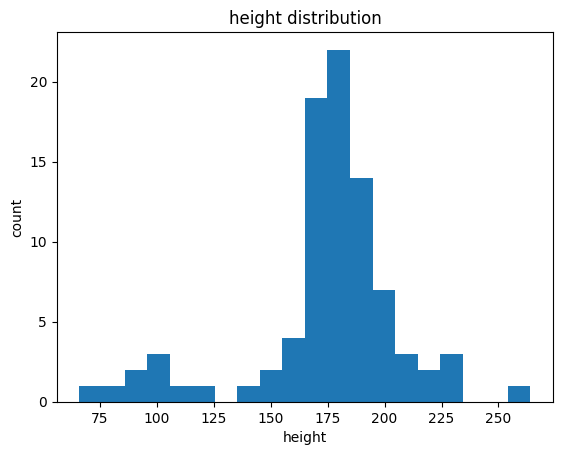

In [127]:
plt.hist(df_cleaned['height'], bins=20)
plt.title('height distribution')
plt.xlabel('height')
plt.ylabel('count')
plt.show()

## Density Plot (Height column)

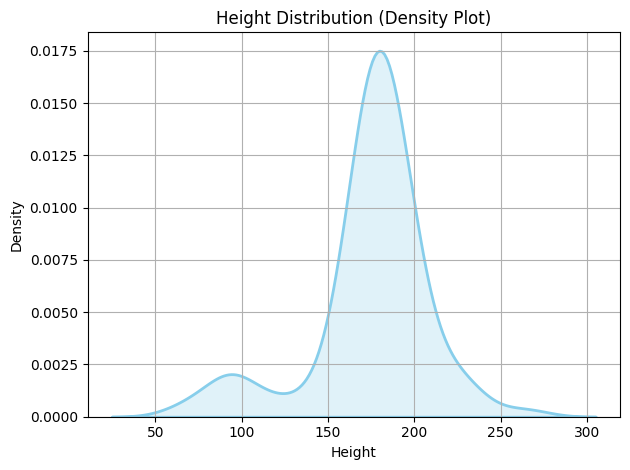

In [128]:
# Create the density plot
sns.kdeplot(data=df_cleaned, x='height', fill=True, color='skyblue', linewidth=2)

# Customize the plot
plt.title('Height Distribution (Density Plot)')
plt.xlabel('Height')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()


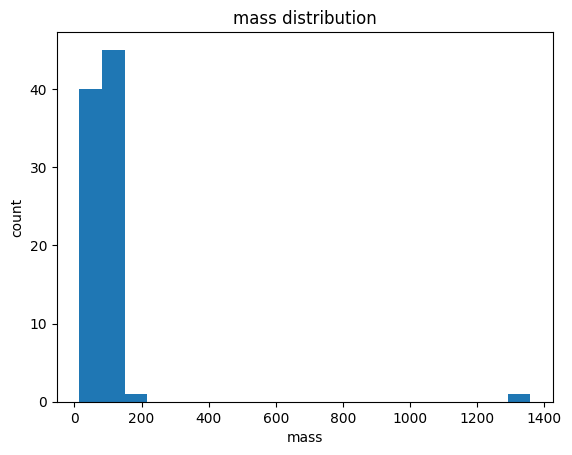

In [129]:
plt.hist(df_cleaned['mass'], bins=20)
plt.title('mass distribution')
plt.xlabel('mass')
plt.ylabel('count')
plt.show()

## Box-Plot (Mass column)

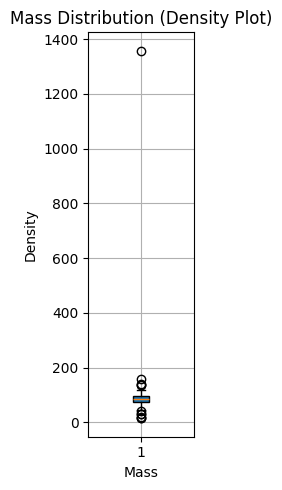

In [130]:
# Create the density plot
plt.figure(figsize=(2,5))
plt.boxplot(df_cleaned['mass'], vert=True, patch_artist=True)

# Customize the plot
plt.title('Mass Distribution (Density Plot)')
plt.xlabel('Mass')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()


## Log-Scaled Box-Plot (Mass column)

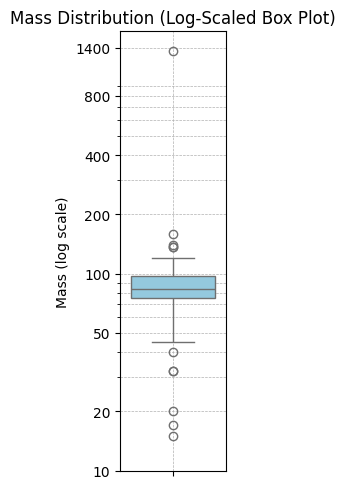

In [131]:
plt.figure(figsize=(2, 5))

# Create the boxplot
sns.boxplot(y=df_cleaned['mass'], color='skyblue')

# Apply log scale
plt.yscale('log')

# Manually set more ticks
ticks = [10, 20, 50, 100, 200, 400, 800, 1400]
plt.yticks(ticks, labels=[str(t) for t in ticks])

# Customize the plot
plt.title('Mass Distribution (Log-Scaled Box Plot)')
plt.ylabel('Mass (log scale)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


# 05.04. - Categorical Data Exploration 

In [132]:
df_cleaned.tail(10)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships
77,Grievous,216.000000,159.000000,none,"brown, white","green, yellow",87.565116,male,masculine,Kalee,Kaleesh,Revenge of the Sith,Tsmeu-6 personal wheel bike,Belbullab-22 starfighter
78,Tarfful,234.000000,136.000000,brown,brown,blue,87.565116,male,masculine,Kashyyyk,Wookiee,Revenge of the Sith,Unknown,Unknown
79,Raymus Antilles,188.000000,79.000000,brown,light,brown,87.565116,male,masculine,Alderaan,Human,"A New Hope, Revenge of the Sith",Unknown,Unknown
80,Sly Moore,178.000000,48.000000,none,pale,white,87.565116,Unknown,Unknown,Umbara,Unknown,"Attack of the Clones, Revenge of the Sith",Unknown,Unknown
81,Tion Medon,206.000000,80.000000,none,grey,black,87.565116,male,masculine,Utapau,Pau'an,Revenge of the Sith,Unknown,Unknown
82,Finn,174.604938,97.311864,black,dark,dark,87.565116,male,masculine,Unknown,Human,The Force Awakens,Unknown,Unknown
83,Rey,174.604938,97.311864,brown,light,hazel,87.565116,female,feminine,Unknown,Human,The Force Awakens,Unknown,Unknown
84,Poe Dameron,174.604938,97.311864,brown,light,brown,87.565116,male,masculine,Unknown,Human,The Force Awakens,Unknown,X-wing
85,BB8,174.604938,97.311864,none,none,black,87.565116,none,masculine,Unknown,Droid,The Force Awakens,Unknown,Unknown
86,Captain Phasma,174.604938,97.311864,none,none,unknown,87.565116,female,feminine,Unknown,Human,The Force Awakens,Unknown,Unknown


In [133]:
print('Species:', df_cleaned["species"].unique())
print('\ngender:', df_cleaned["gender"].unique())

Species: ['Human' 'Droid' 'Wookiee' 'Rodian' 'Hutt' 'Unknown' "Yoda's species"
 'Trandoshan' 'Mon Calamari' 'Ewok' 'Sullustan' 'Neimodian' 'Gungan'
 'Toydarian' 'Dug' 'Zabrak' "Twi'lek" 'Aleena' 'Vulptereen' 'Xexto'
 'Toong' 'Cerean' 'Nautolan' 'Tholothian' 'Iktotchi' 'Quermian' 'Kel Dor'
 'Chagrian' 'Geonosian' 'Mirialan' 'Clawdite' 'Besalisk' 'Kaminoan'
 'Skakoan' 'Muun' 'Togruta' 'Kaleesh' "Pau'an"]

gender: ['masculine' 'feminine' 'Unknown']


## Bar Chart - Species Count

/var/folders/tc/s2nvq1sx1t386h255fx3qslc0000gn/T/ipykernel_27523/1577898274.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned,


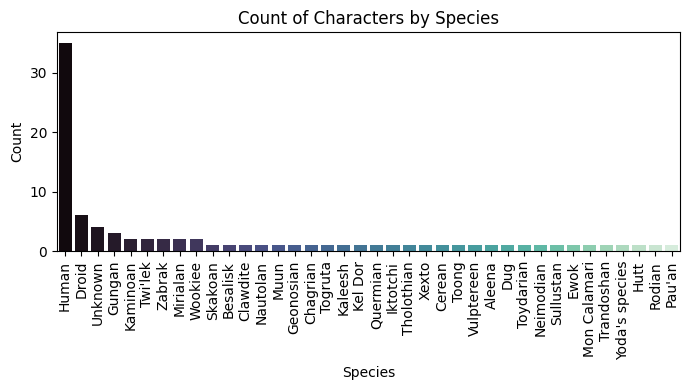

In [134]:
plt.figure(figsize=(7, 4))

# Create the bar chart
sns.countplot(data=df_cleaned, 
              x='species', 
              order=df_cleaned['species'].value_counts().index, 
              palette='mako'  # palette opitons: 'mako', 'Set2', 'coolwarm', 'viridis'
              )

# Customize the plot
plt.title('Count of Characters by Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Grouped Bar Chart

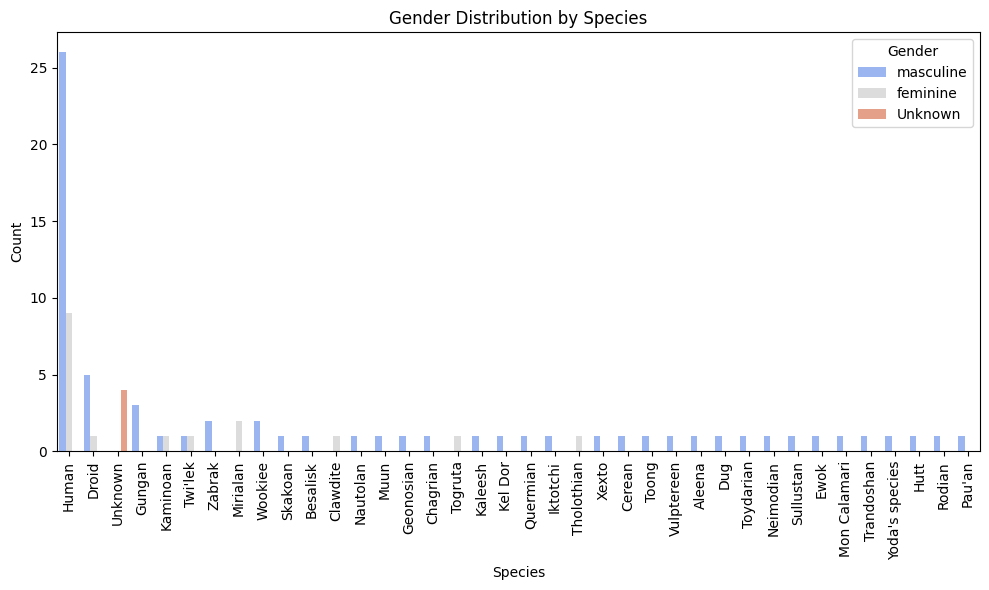

In [135]:
plt.figure(figsize=(10, 6))

sns.countplot(data=df_cleaned, 
              order=df_cleaned['species'].value_counts().index, 
              x='species', 
              hue='gender', 
              palette='coolwarm')

plt.title('Gender Distribution by Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


## Stacked Bar Chart

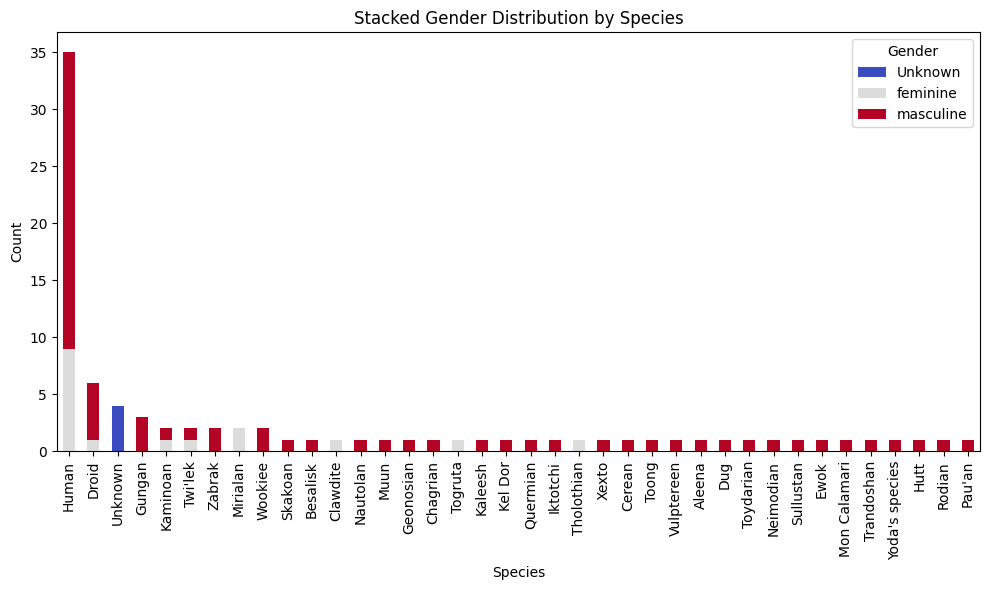

In [136]:
# Count gender per species
grouped = df_cleaned.groupby(['species', 'gender']).size().unstack(fill_value=0)

# Reorder rows by species frequency
species_order = df_cleaned['species'].value_counts().index
grouped = grouped.loc[species_order]

grouped.plot(kind='bar', 
             stacked=True, 
             figsize=(10, 6), 
             colormap='coolwarm') # palette opitons: 'mako', 'Set2', 'coolwarm', 'viridis'

plt.title('Stacked Gender Distribution by Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


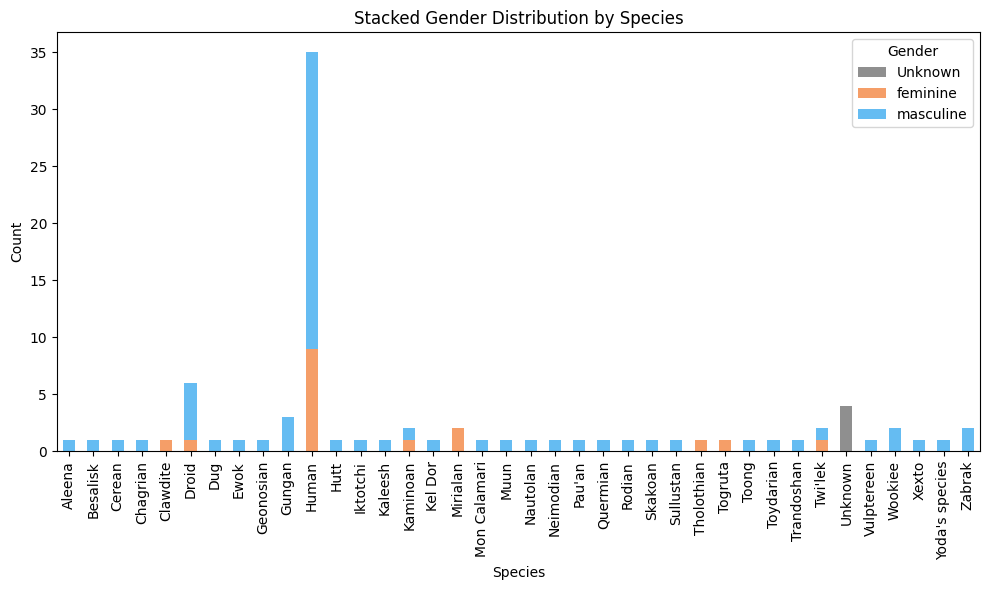

In [137]:
# Define custom colors for each gender
gender_colors = {
    'masculine': "#65bcf2",     # blue
    'feminine': "#f59e68",   # orange
    'Unknown': "#8f8f8f"   # green
}

# Count gender per species
grouped = df_cleaned.groupby(['species', 'gender']).size().unstack(fill_value=0)

grouped.plot(kind='bar',
             stacked=True,
             figsize=(10, 6),
             color=[gender_colors[gender] for gender in grouped.columns])

plt.title('Stacked Gender Distribution by Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


# 05.05. - Correlation and Relationships

In [138]:
def pearson_corr_pandas(df, col1, col2):
    return df[[col1, col2]].corr(method='pearson').iloc[0, 1]

height_mass_r = pearson_corr_pandas(df_cleaned, 'height', 'mass')
birth_height_r = pearson_corr_pandas(df_cleaned, 'birth_year', 'height')
birth_mass_r = pearson_corr_pandas(df_cleaned, 'birth_year', 'mass')

print('correlation coefficient h/m  r =', height_mass_r)
print('correlation coefficient by/h  r =', birth_height_r)
print('correlation coefficient by/m  r =', birth_mass_r)

correlation coefficient h/m  r = 0.11386558169762823
correlation coefficient by/h  r = -0.2419840662874878
correlation coefficient by/m  r = 0.47224201913680874


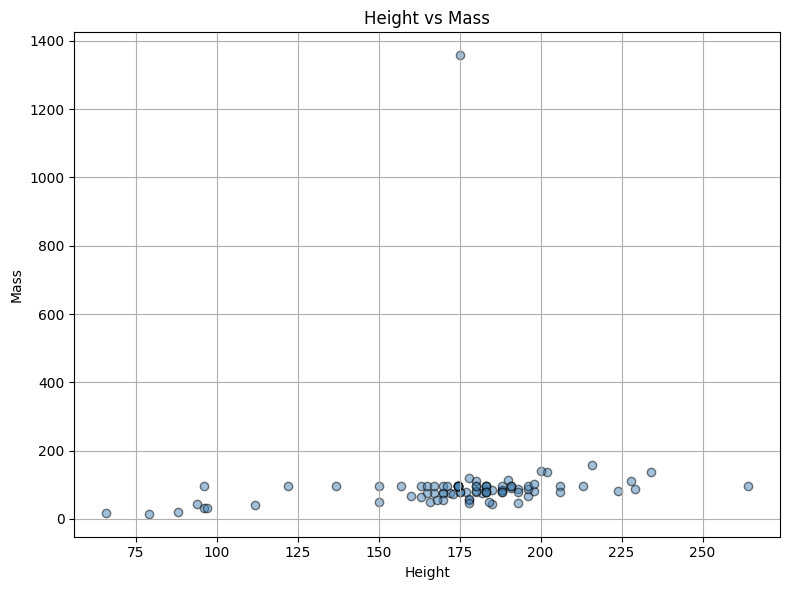

In [139]:
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned['height'], 
            df_cleaned['mass'], 
            color='steelblue', 
            alpha=0.5, 
            edgecolors='k')

plt.title('Height vs Mass')
plt.xlabel('Height')
plt.ylabel('Mass')
plt.grid(True)
plt.tight_layout()
plt.show()


## Plot correlation scatter plots

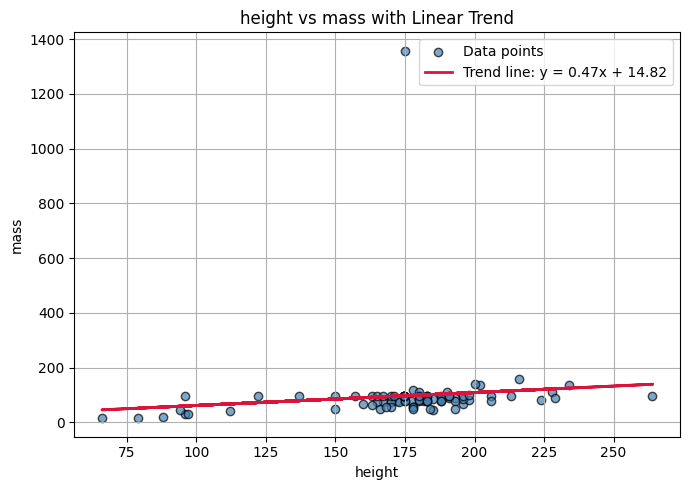

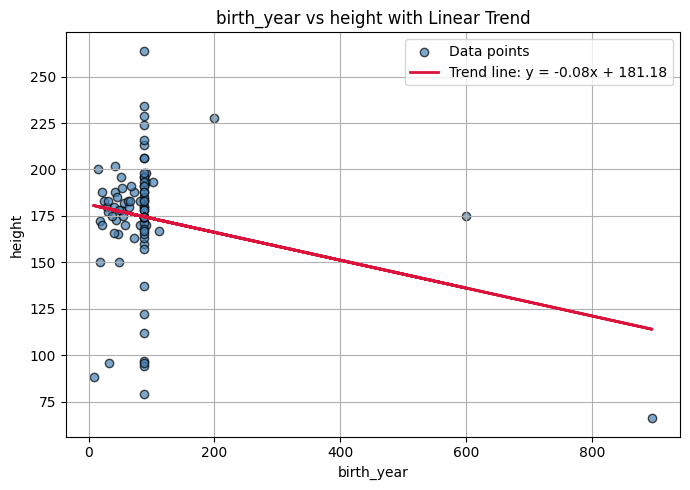

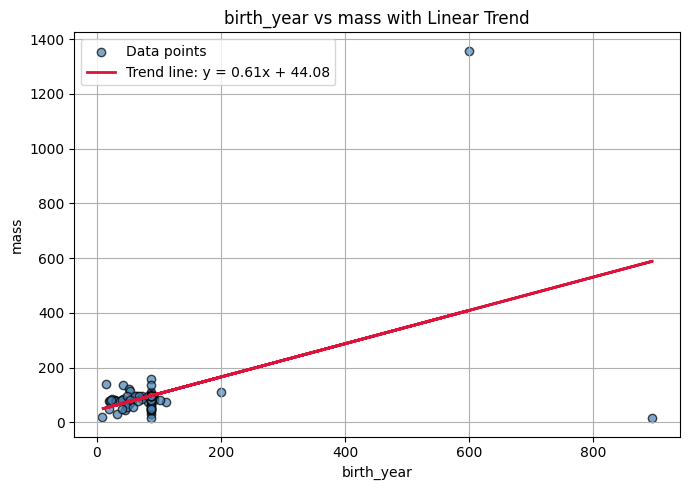

In [140]:
correlations = [['height','mass'],
                ['birth_year','height'],
                ['birth_year','mass']]

for i,j in correlations:
    
    x = df_cleaned[i]
    y = df_cleaned[j]

    # Create scatter plot
    plt.figure(figsize=(7, 5))
    plt.scatter(x, y, 
                color='steelblue', 
                alpha=0.7, 
                edgecolors='k', 
                label='Data points')

    # Fit linear trend line
    a, b = np.polyfit(x, y, 1)
    plt.plot(x, a*x + b, 
            color='crimson', 
            linewidth=2, 
            label=f'Trend line: y = {a:.2f}x + {b:.2f}')

    # Customize plot
    plt.title(f'{i} vs {j} with Linear Trend')
    plt.xlabel(i)
    plt.ylabel(j)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


### Correlation without Outliers:

In [141]:
# Filter relevant columns
df_filtered = df_cleaned[num_cols]

# Compute z-scores
z_scores = np.abs((df_filtered - df_filtered.mean()) / df_filtered.std())

# Keep rows where both height and mass are within 3 standard deviations
df_no_outliers = df_filtered[(z_scores < 3).all(axis=1)]

df_no_outliers

,height,mass,birth_year
0,172.000000,77.000000,19.000000
1,167.000000,75.000000,112.000000
2,96.000000,32.000000,33.000000
3,202.000000,136.000000,41.900000
4,150.000000,49.000000,19.000000
...,...,...,...
82,174.604938,97.311864,87.565116
83,174.604938,97.311864,87.565116
84,174.604938,97.311864,87.565116
85,174.604938,97.311864,87.565116


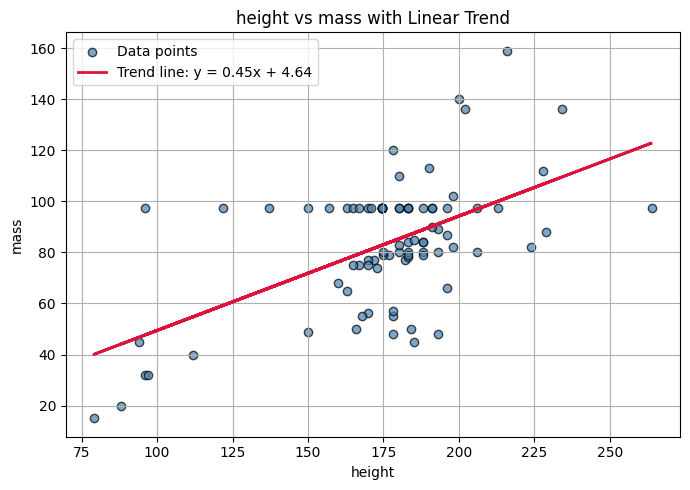

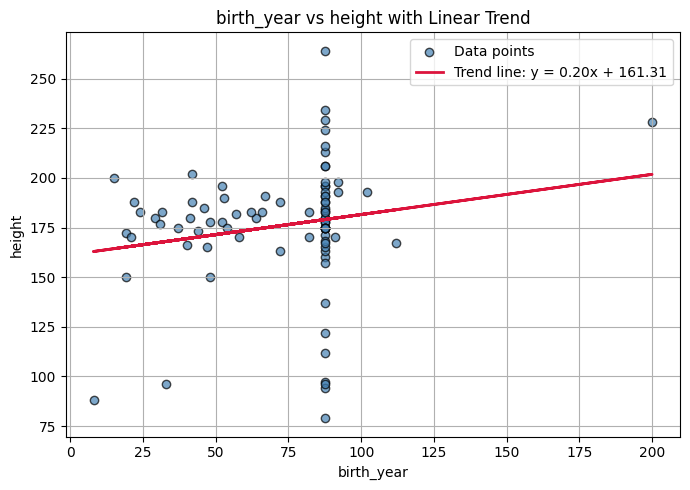

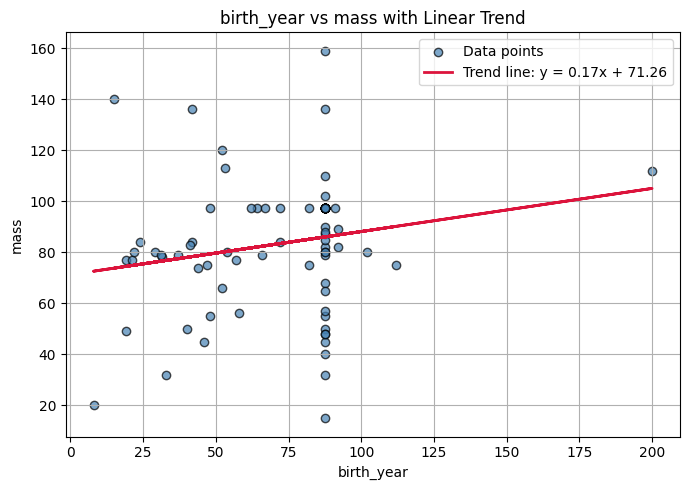

In [142]:
correlations = [['height','mass'],
                ['birth_year','height'],
                ['birth_year','mass']]

for i,j in correlations:
    
    x = df_no_outliers[i]
    y = df_no_outliers[j]

    # Create scatter plot
    plt.figure(figsize=(7, 5))
    plt.scatter(x, y, 
                color='steelblue', 
                alpha=0.7, 
                edgecolors='k', 
                label='Data points')

    # Fit linear trend line
    a, b = np.polyfit(x, y, 1)
    plt.plot(x, a*x + b, 
            color='crimson', 
            linewidth=2, 
            label=f'Trend line: y = {a:.2f}x + {b:.2f}')

    # Customize plot
    plt.title(f'{i} vs {j} with Linear Trend')
    plt.xlabel(i)
    plt.ylabel(j)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [143]:
height_mass_r_NOOUTLIERS = pearson_corr_pandas(df_no_outliers, 'height', 'mass')
birth_height_r_NOOUTLIERS = pearson_corr_pandas(df_no_outliers, 'birth_year', 'height')
birth_mass_r_NOOUTLIERS = pearson_corr_pandas(df_no_outliers, 'birth_year', 'mass')

print('With Outliers')
print('num of entries:', df_cleaned[num_cols].size)
print('correlation coefficient h/m  r =', height_mass_r)
print('correlation coefficient by/h  r =', birth_height_r)
print('correlation coefficient by/m  r =', birth_mass_r)
print()
print('Without Outliers')
print('num of entries:', df_no_outliers[num_cols].size)
print('num of removed outliers:', df_cleaned[num_cols].size - df_no_outliers[num_cols].size)
print('correlation coefficient h/m  r =', height_mass_r_NOOUTLIERS)
print('correlation coefficient by/h  r =', birth_height_r_NOOUTLIERS)
print('correlation coefficient by/m  r =', birth_mass_r_NOOUTLIERS)

With Outliers
num of entries: 261
correlation coefficient h/m  r = 0.11386558169762823
correlation coefficient by/h  r = -0.2419840662874878
correlation coefficient by/m  r = 0.47224201913680874

Without Outliers
num of entries: 255
num of removed outliers: 6
correlation coefficient h/m  r = 0.5648319374870595
correlation coefficient by/h  r = 0.18158840915294752
correlation coefficient by/m  r = 0.19124204245392135


## Correlation Heatmap

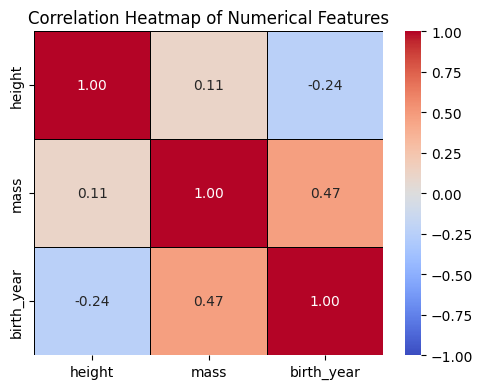

In [144]:
# Compute the correlation matrix
corr_matrix = df_cleaned[num_cols].corr(method='pearson')

# Plot the heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, 
            annot=True,           # Show correlation values
            fmt=".2f",            # Format to 2 decimal places
            cmap='coolwarm',      # Color gradient from negative to positive
            center=0,             # Center the colormap at 0
            linewidths=0.5,       # Add lines between cells
            linecolor='black',
            vmin=-1, vmax=1       # Manual limits for color scale
)

# Customize the plot
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()


## Correlation Heatmap - No Outliers

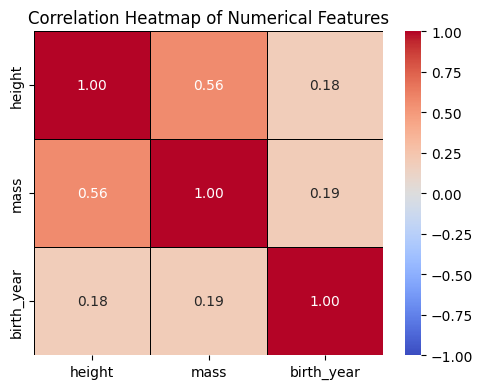

In [145]:
# Compute the correlation matrix
corr_matrix = df_no_outliers[num_cols].corr(method='pearson')

# Plot the heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, 
            annot=True,           # Show correlation values
            fmt=".2f",            # Format to 2 decimal places
            cmap='coolwarm',      # Color gradient from negative to positive
            center=0,             # Center the colormap at 0
            linewidths=0.5,       # Add lines between cells
            linecolor='black',
            vmin=-1, vmax=1       # Manual limits for color scale
)

# Customize the plot
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()


# 05.06. - Interactive Visualization and Exploratory Data Analysis

In [146]:
df_cleaned.tail(10)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships
77,Grievous,216.000000,159.000000,none,"brown, white","green, yellow",87.565116,male,masculine,Kalee,Kaleesh,Revenge of the Sith,Tsmeu-6 personal wheel bike,Belbullab-22 starfighter
78,Tarfful,234.000000,136.000000,brown,brown,blue,87.565116,male,masculine,Kashyyyk,Wookiee,Revenge of the Sith,Unknown,Unknown
79,Raymus Antilles,188.000000,79.000000,brown,light,brown,87.565116,male,masculine,Alderaan,Human,"A New Hope, Revenge of the Sith",Unknown,Unknown
80,Sly Moore,178.000000,48.000000,none,pale,white,87.565116,Unknown,Unknown,Umbara,Unknown,"Attack of the Clones, Revenge of the Sith",Unknown,Unknown
81,Tion Medon,206.000000,80.000000,none,grey,black,87.565116,male,masculine,Utapau,Pau'an,Revenge of the Sith,Unknown,Unknown
82,Finn,174.604938,97.311864,black,dark,dark,87.565116,male,masculine,Unknown,Human,The Force Awakens,Unknown,Unknown
83,Rey,174.604938,97.311864,brown,light,hazel,87.565116,female,feminine,Unknown,Human,The Force Awakens,Unknown,Unknown
84,Poe Dameron,174.604938,97.311864,brown,light,brown,87.565116,male,masculine,Unknown,Human,The Force Awakens,Unknown,X-wing
85,BB8,174.604938,97.311864,none,none,black,87.565116,none,masculine,Unknown,Droid,The Force Awakens,Unknown,Unknown
86,Captain Phasma,174.604938,97.311864,none,none,unknown,87.565116,female,feminine,Unknown,Human,The Force Awakens,Unknown,Unknown


## y-data profiling report

In [147]:
from ydata_profiling import ProfileReport 

profile = ProfileReport( 
    df_cleaned, title="Starwars Dataset Profiling Report", explorative=True) 

profile.to_file("starwars_dataset_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 346.26it/s]


how are text/categorical variables handled?

## interactive scatter plot - PLOTLY

In [ ]:
import plotly.express as px

# df_plot = df_cleaned[['name', 'height', 'mass']]

# Create interactive scatter plot
fig = px.scatter(df_cleaned,
                 x='height',
                 y='mass',
                 hover_name='name',         # Show character name on hover
                 hover_data={
                     'gender': True,
                     'species': True,
                     'birth_year': ':.0f',  # Format as one decimal
                     'height': True,       # Already shown on axis
                     'mass': True          # Already shown on axis
                 },
                 title='Height vs Mass (Interactive)',
                 labels={'height': 'Height (cm)', 'mass': 'Mass (kg)'},
                 template='plotly_dark',     # Optional: dark theme
                 width=800,
                 height=600)

# Show plot
fig.show()

## interactive bar plot for categorical variables

In [ ]:
import plotly.express as px

# Aggregate species counts
species_counts = df_cleaned['species'].value_counts().reset_index()
species_counts.columns = ['species', 'count'] # ensure the count column is called 'count'

# Create interactive bar chart
fig = px.bar(species_counts,
             x='count',
             y='species',
             orientation='h',              # This makes it horizontal
             title='Species Count (Interactive)',
             template='plotly_dark',
             width=800,
             height=600)

fig.show()


## With species-specific hover-information

In [173]:
species_info = df_cleaned.groupby('species').agg({
    'height': 'mean',
    'mass': 'mean',
    'birth_year': 'mean',
    'name': 'count'  # count of characters per species
}).reset_index()

species_info.rename(columns={'name': 'count'}, inplace=True)

import plotly.express as px

fig = px.bar(species_info,
             x='species',
             y='count',
             hover_data={
                 'height': ':.1f',
                 'mass': ':.1f',
                 'birth_year': ':.0f',
                 'count': True
             },
             title='Species Count with Detailed Hover Info',
             template='plotly_dark',
             width=900,
             height=600)

fig.show()


## Including Gender % percentages

In [189]:
import plotly.express as px

# Step 1: Count gender per species
gender_counts = df_cleaned.groupby(['species', 'gender']).size().unstack(fill_value=0)

# Step 2: Calculate gender percentages
gender_percent = gender_counts.div(gender_counts.sum(axis=1), axis=0) * 100
gender_percent = gender_percent.reset_index()

# Step 3: Count total characters per species
species_counts = df_cleaned['species'].value_counts().reset_index()
species_counts.columns = ['species', 'count']

# Step 4: Merge counts and percentages
merged = species_counts.merge(gender_percent, on='species')

# Step 5: Create interactive bar chart with rich hover data
fig = px.bar(merged,
             x='species',
             y='count',
             hover_data={
                 'count': True,
                 'masculine': ':.1f',
                 'feminine': ':.1f',
                 'Unknown': ':.1f'
             },
             color_discrete_map={
                 'Masculine': '#1f77b4',
                 'Feminine': '#e377c2',
                 'Unknown': '#7f7f7f'
             },
             title='Species Count with Gender Distribution (%)',
             template='plotly_dark',
             width=900,
             height=600)

fig.show()


In [197]:
import pandas as pd
import plotly.express as px

# Count gender per species
gender_counts['percent'] = (
    gender_counts['count'] / gender_counts.groupby('species')['count'].transform('sum') * 100
)

# Compute total counts per species
species_order = (
    gender_counts.groupby('species')['count']
    .sum()
    .sort_values(ascending=False)
    .index
    .tolist()
)

# Create bar chart with sorted species
fig = px.bar(gender_counts,
             x='species',
             y='count',
             color='gender',
             hover_data={
                 'count': True,
                 'percent': ':.1f'
             },
             color_discrete_map={
                 'masculine': '#1f77b4',
                 'feminine': '#e377c2',
                 'Unknown': '#7f7f7f'
             },
             category_orders={'species': species_order},  # <-- enforce order
             title='Species Count with Gender Distribution (%)',
             template='plotly_dark',
             width=900,
             height=600)

fig.show()


# EXTRA: convert birthyear into actual date format

The following breaks, because pandas only allows years between 1677 and 2262.

In [14]:
df = df_cleaned.copy()

# Step 1: Separate year and fractional part
df['year'] = df['birth_year'].astype(int)
df['year_str'] = df['year'].astype(str).str.zfill(4)
df['fraction'] = df['birth_year'] - df['year']

# Step 2: Convert fractional year to days
# Assume 365 days per year (or use 365.25 for leap year approximation)
df['day_of_year'] = (df['fraction'] * 365).round().astype(int)

# Step 3: Build datetime from year and day-of-year
# df['date'] = pd.to_datetime(df['year_str'].astype(str), format='%Y') + pd.to_timedelta(df['day_of_year'], unit='D')

# Optional: Format as DD.MM.YYYY
# df['date_str'] = df['date'].dt.strftime('%d.%m.%Y')

using python's built-in datetime

In [15]:
from datetime import datetime, timedelta

df_date = df_cleaned.copy()

def float_to_date(year_float):
    year = int(year_float)
    fraction = year_float - year
    day_of_year = int(round(fraction * 365))
    try:
        return datetime(year, 1, 1) + timedelta(days=day_of_year)
    except ValueError:
        return None  # or datetime.min if you prefer

# Apply to your DataFrame
df_date['date'] = df_date['birth_year'].apply(float_to_date)
df_date['date_str'] = df_date['date'].apply(lambda d: d.strftime('%d.%m.%Y') if d else 'Invalid')

df_date.head()


,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships,date,date_str
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human,"A New Hope, The Empire Strikes Back, Return of...","Snowspeeder, Imperial Speeder Bike","X-wing, Imperial shuttle",0019-01-01 00:00:00,01.01.0019
1,C-3PO,167.0,75.0,Unknown,gold,yellow,112.0,none,masculine,Tatooine,Droid,"A New Hope, The Empire Strikes Back, Return of...",Unknown,Unknown,0112-01-01 00:00:00,01.01.0112
2,R2-D2,96.0,32.0,Unknown,"white, blue",red,33.0,none,masculine,Naboo,Droid,"A New Hope, The Empire Strikes Back, Return of...",Unknown,Unknown,0033-01-01 00:00:00,01.01.0033
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human,"A New Hope, The Empire Strikes Back, Return of...",Unknown,TIE Advanced x1,0041-11-25 00:00:00,25.11.0041
4,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human,"A New Hope, The Empire Strikes Back, Return of...",Imperial Speeder Bike,Unknown,0019-01-01 00:00:00,01.01.0019
